# Plot the fitted line for the data

Text(1, 17, 'y = -0.8929 + 2.3095x')

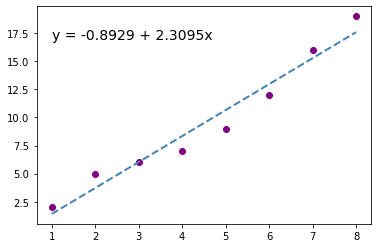

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#define data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([2, 5, 6, 7, 9, 12, 16, 19])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', size=14)

# Define functions

In [21]:
from MPC2_phy_proj import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def getEnergy(coord_str):
    '''
    split the txt into coordinations,as well as plot the atoms using PLOTLY
    '''
    # split into 'O', 'H', and float
    prism_split = coord_str.split()
    rall_L = []
    for i in range(int(len(prism_split)/4)):
        rall_L.append(float(prism_split[i*4+1])*0.1)
        rall_L.append(float(prism_split[i*4+2])*0.1)
        rall_L.append(float(prism_split[i*4+3])*0.1) 

    # merge the float data into 3d_coord, yield rall,xall,yall,zall
    rall = []
    xall=[]
    yall=[]
    zall=[]
    for i in range(int(len(rall_L)/3)):
        coord = []
        coord.append(float(rall_L[i*3]))
        xall.append(float(rall_L[i*3]))
        coord.append(float(rall_L[i*3+1]))
        yall.append(float(rall_L[i*3+1]))
        coord.append(float(rall_L[i*3+2]))
        zall.append(float(rall_L[i*3+2]))
        rall.append(coord)
    print('len(rall):',len(rall))
    #print('rall=',rall)
    
    # create qall regard to the len(rall)
    qall = []
    for i in range(int(len(rall)/3)):
        qall.append(float(-0.6569052996153647))
        qall.append(float(0.32845264980768235))
        qall.append(float(0.32845264980768235))
    print('len(qall):',len(qall))
    #print('qall=',qall)

    #calculate the total energy
    #import MPC2_phy_proj import *
    rall = np.array(rall)*1E-9
    print('total E:', potl_energy_sum(rall,qall))
    
    #plot the points, red for OXYGEN, blue for HYDROGEN
    #import plotly.graph_objects as go
    #from plotly.subplots import make_subplots

    fig = make_subplots()
    O_atoms = go.Scatter3d(x=xall[::3], y=yall[::3], z=zall[::3],mode='markers',marker = {'color' : 'red'})
    H_atoms01 = go.Scatter3d(x=xall[1::3], y=yall[1::3], z=zall[1::3],mode='markers',marker = {'color' : 'blue'})
    H_atoms02 = go.Scatter3d(x=xall[2::3], y=yall[2::3], z=zall[2::3],mode='markers',marker = {'color' : 'blue'})

    fig.add_trace(O_atoms)
    fig.add_trace(H_atoms01)
    fig.add_trace(H_atoms02)

    fig.show()
    
    #END OF FUNCTION
    return None

In [22]:
def getOxyCoord(coord_str):
    '''
    split the txt into coordinations,as well as plot the atoms using PLOTLY
    '''
    # split into 'O', 'H', and float
    prism_split = coord_str.split()
    rall_L = []
    for i in range(int(len(prism_split)/4)):
        rall_L.append(float(prism_split[i*4+1])*0.1)
        rall_L.append(float(prism_split[i*4+2])*0.1)
        rall_L.append(float(prism_split[i*4+3])*0.1) 

    # merge the float data into 3d_coord, yield rall,xall,yall,zall
    rall = []
    xall=[]
    yall=[]
    zall=[]
    for i in range(int(len(rall_L)/3)):
        coord = []
        coord.append(float(rall_L[i*3]))
        xall.append(float(rall_L[i*3]))
        coord.append(float(rall_L[i*3+1]))
        yall.append(float(rall_L[i*3+1]))
        coord.append(float(rall_L[i*3+2]))
        zall.append(float(rall_L[i*3+2]))
        rall.append(coord)
    print('len(rall):',len(rall))
    #print('rall=',rall)
    
    # create qall regard to the len(rall)

    #calculate the total energy
    #import MPC2_phy_proj import *
    rall = np.array(rall)*1E-9


    #END OF FUNCTION
    return xall[::3],yall[::3],zall[::3]

In [12]:
dist(np.array([0.89740000, -1.28511100, 1.37567400]),np.array([-0.90399800, 1.53998500, 0.71690900]))


0.968080339024608

# Prime isomer for H2O hexamer 

In [18]:
prism = '''
 O 0.89740000 -1.28511100 1.37567400
 H 0.93366000 -1.62024900 0.46129100
 H 1.53842400 -0.56327000 1.32598100
 O -1.55921800 -0.24177800 1.42347400
 H -2.06410200 -0.50196600 2.19746400
 H -0.67765600 -0.67864600 1.52523700
 O 2.09078900 0.98445200 -0.04569300
 H 1.25856800 1.49842100 -0.01864600
 H 2.78821600 1.64209800 -0.09388600
 O -0.44703200 2.02126000 0.01211400
 H -0.90399800 1.53998500 0.71690900
 H -0.91108100 1.70047200 -0.77105600
 O -1.77668100 -0.21141100 -1.35117600
 H -2.56069800 -0.51617900 -1.81406100
 H -1.94980100 -0.38724200 -0.40953000
 O 0.92440000 -1.33940500 -1.43239500
 H 0.04462600 -0.99239900 -1.63526700
 H 1.46658100 -0.54508700 -1.34041000 '''#-8.143167425298383e-18#0.9745401671213969

In [29]:
xa = [0.08974, -0.1559218, 0.2090789, -0.0447032, -0.1776681, 0.09244000000000001] 
ya = [-0.1285111,
-0.0241778,
0.09844520000000001,
0.202126,
-0.0211411,
-0.1339405]
za = [0.1375674,
0.14234739999999999,
-0.0045693,
0.0012114,
-0.1351176,
-0.14323950000000002]
        
alllist = np.stack((np.array(xa), np.array(ya),np.array(za)), axis=-1)
alllist

array([[ 0.08974  , -0.1285111,  0.1375674],
       [-0.1559218, -0.0241778,  0.1423474],
       [ 0.2090789,  0.0984452, -0.0045693],
       [-0.0447032,  0.202126 ,  0.0012114],
       [-0.1776681, -0.0211411, -0.1351176],
       [ 0.09244  , -0.1339405, -0.1432395]])

In [28]:
prism_split = prism.split()
rall_L = []
for i in range(int(len(prism_split)/4)):
    rall_L.append(float(prism_split[i*4+1])*0.1)
    rall_L.append(float(prism_split[i*4+2])*0.1)
    rall_L.append(float(prism_split[i*4+3])*0.1) 

# merge the float data into 3d_coord, yield rall,xall,yall,zall
rall = []
xall=[]
yall=[]
zall=[]
for i in range(int(len(rall_L)/3)):
    coord = []
    coord.append(float(rall_L[i*3]))
    xall.append(float(rall_L[i*3]))
    coord.append(float(rall_L[i*3+1]))
    yall.append(float(rall_L[i*3+1]))
    coord.append(float(rall_L[i*3+2]))
    zall.append(float(rall_L[i*3+2]))
    rall.append(coord)
print('len(rall):',len(rall))
#print('rall=',rall)

# create qall regard to the len(rall)

#calculate the total energy
#import MPC2_phy_proj import *
rall = np.array(rall)*1E-9
np.array(rall_L[::3])

len(rall): 18


array([ 0.08974  ,  0.093366 ,  0.1538424, -0.1559218, -0.2064102,
       -0.0677656,  0.2090789,  0.1258568,  0.2788216, -0.0447032,
       -0.0903998, -0.0911081, -0.1776681, -0.2560698, -0.1949801,
        0.09244  ,  0.0044626,  0.1466581])

# cage for hexamer isomer

In [13]:
cage = '''
 O -0.61663800 -1.01709300 -1.42595600
 H -0.48199700 -1.68747900 -2.10024200
 H -0.10522200 -1.33088600 -0.65758600
 O 0.71421100 -1.32594900 1.02378500
 H 0.17850400 -0.56002400 1.36552800
 H 0.64413800 -2.00496200 1.69948000
 O 2.83951700 0.01127500 -0.23955200
 H 3.65774900 0.13196100 0.24666000
 H 2.29497900 -0.56139100 0.32455400
 O -0.68983300 0.84373600 1.54471800
 H -0.28085500 1.37899700 0.84044400
 H -1.59264600 0.71192100 1.21534400
 O -2.88022200 -0.00526300 -0.03950300
 H -3.53060900 0.46348300 -0.56656200
 H -2.26705000 -0.39104600 -0.68464400
 O 0.60542900 1.68080900 -0.81328200
 H 0.19797400 1.01354700 -1.37809900
 H 1.50533400 1.33575100 -0.70655300 
'''

In [14]:
getEnergy(cage)

len(rall): 18
len(qall): 18
total E: -8.133094054626203e-18


# prism_book for hexamer

In [19]:
prism_book = '''

O -0.02781100 0.52399700 2.05893000
 H 0.51382500 1.04465100 1.44949700
 H -0.90505700 0.90020300 1.94232600
 O 1.36101400 1.57004400 -0.28159400
 H 1.75422200 0.71750500 -0.58466600
 H 2.02907800 2.23588300 -0.46060300
 O -1.39932500 1.61321800 -0.62078500
 H -0.42896500 1.69288100 -0.65405000
 H -1.72549500 2.33507000 -1.16257900
 O 2.08619300 -0.90482100 -0.97681600
 H 2.90861400 -1.38199800 -0.84801700
 H 1.41961700 -1.39472600 -0.43624700
 O -2.23736100 -1.07534800 -0.59133900
 H -2.66435500 -1.32906700 -1.41191900
 H -2.02717700 -0.13260000 -0.70095000
 O 0.18010800 -1.92394300 0.58860600
 H 0.11055600 -1.26008500 1.29363000
 H -0.68741400 -1.85289600 0.15756200

'''

In [20]:
getEnergy(prism_book)

len(rall): 18
len(qall): 18
total E: -8.143127859874674e-18


# 2 prism structures form other coord source

In [26]:
prism_2 = '''
O             -2.1675526522  -2.0544029015  -0.4337647119  
H             -1.3531471666  -2.5389321875  -0.6352882840  
H             -1.8715507614  -1.1308550588  -0.5712015155  
O         -0.6716977019   0.2944490104  -0.4731366656  
H           0.0613027114  -0.3301277055  -0.5823914443  
H         -0.6662754913   0.4977657773   0.4757800816  
O        0.7338021938  -2.2712610461  -0.4178562959  
H              1.5224027002  -2.7112002511  -0.7469640553  
H            0.7912691510  -2.3178568450   0.5623860615  
O            0.5477615506  -2.2081713860   2.3095474506  
H              0.5487271572  -1.2696791005   2.5435981222  
H             -0.3848259533  -2.4450162628   2.4407198618  
O            -2.3039695896  -2.0206189589   2.2137143494  
H            -2.3596274689  -2.0978839796   1.2226652906  
H           -3.1107672987  -2.4106894763   2.5610245710  
O            -0.8889898251   0.3442982323   2.4253171742  
H            -1.1868458820   1.0730525498   2.9769993607  
H           -1.5792840937  -0.3439096032   2.4908364462 

'''

In [27]:
getEnergy(prism_2)

len(rall): 18
len(qall): 18
total E: -8.134424382309768e-18


In [28]:
prism_3 = '''
O -1.446440 -0.285597 1.450797
H -0.501281 -0.623567 1.569896
H -1.943242 -0.555618 2.236008
O -1.695011 -0.579072 -1.302025
H -1.817437 -0.659628 -0.325708
H -2.436237 -1.048118 -1.711413
O -0.792209 2.033033 -0.154883
H -1.102321 1.509852 0.613676
H -1.172032 1.536884 -0.903733
O 1.096107 -1.073536 1.478083
H 1.136246 -1.446580 0.560127
H 1.581464 -0.233887 1.359800
O 1.123824 -1.394464 -1.307193
H 0.179274 -1.211912 -1.492741
H 1.532644 -0.506789 -1.280181
O 1.853713 1.250292 -0.179010
H 0.946277 1.656566 -0.192952
H 2.476782 1.977545 -0.318937

'''

In [29]:
getEnergy(prism_3)

len(rall): 18
len(qall): 18
total E: -8.058951511818899e-18
